In [1]:
import pickle
import numpy as np
#RNN With LSTM(Memory Networks)

In [2]:
with open("train_qa.txt",'rb') as f:
  train_data=pickle.load(f)

In [3]:
with open("test_qa.txt",'rb') as f:
  test_data=pickle.load(f)

In [4]:
type(train_data)

list

In [5]:
type(test_data)

list

In [6]:
len(train_data)

10000

In [7]:
len(test_data)

1000

In [8]:
" ".join(train_data[0][0])

'Mary moved to the bathroom . Sandra journeyed to the bedroom .'

In [9]:
" ".join(train_data[0][1])

'Is Sandra in the hallway ?'

In [10]:
train_data[0][2]

'no'

In [11]:
all_data=train_data+test_data

In [12]:
len(all_data)

11000

In [13]:
vocab=set()

In [14]:
for story,question,answer in all_data:
  vocab=vocab.union(set(story))
  vocab=vocab.union(set(question))

In [15]:
vocab.add('no')
vocab.add('yes')

In [16]:
len(vocab)

37

In [17]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [18]:
vocab_len=len(vocab)+1

In [19]:
vocab_len

38

In [20]:

all_story_lens=[len(data[0]) for data in all_data]

In [21]:
max_story_len=max(all_story_lens)

In [64]:
max_question_len=max([len(data[1]) for data in all_data])

In [65]:
max_question_len

6

In [56]:
# We have Reserve 0 for keras pad_sequences
vocab_size = len(vocab) + 1

In [58]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer(filters=[])
tokenizer.fit_on_texts(vocab)
tokenizer.word_index

{'in': 1,
 'left': 2,
 'discarded': 3,
 'to': 4,
 'daniel': 5,
 'down': 6,
 'went': 7,
 'office': 8,
 'is': 9,
 'football': 10,
 'moved': 11,
 'up': 12,
 'travelled': 13,
 'kitchen': 14,
 'no': 15,
 'picked': 16,
 '?': 17,
 'put': 18,
 'grabbed': 19,
 'yes': 20,
 'took': 21,
 'bathroom': 22,
 'got': 23,
 'back': 24,
 'dropped': 25,
 'garden': 26,
 'hallway': 27,
 '.': 28,
 'there': 29,
 'bedroom': 30,
 'john': 31,
 'apple': 32,
 'the': 33,
 'mary': 34,
 'sandra': 35,
 'milk': 36,
 'journeyed': 37}

In [59]:
train_story_text = []
train_question_text = []
train_answers = []

for story,question,answer in train_data:
    train_story_text.append(story)
    train_question_text.append(question)

In [60]:
train_story_seq = tokenizer.texts_to_sequences(train_story_text)

In [61]:
len(train_story_text)

10000

In [62]:
len(train_story_seq)

10000

In [66]:
def vectorize_stories(data, word_index=tokenizer.word_index, max_story_len=max_story_len,max_question_len=max_question_len):



    X = []

    Xq = []

    Y = []


    for story, query, answer in data:


        x = [word_index[word.lower()] for word in story]

        xq = [word_index[word.lower()] for word in query]


        y = np.zeros(len(word_index) + 1)


        y[word_index[answer]] = 1

        X.append(x)
        Xq.append(xq)
        Y.append(y)


    return (pad_sequences(X, maxlen=max_story_len),pad_sequences(Xq, maxlen=max_question_len), np.array(Y))

In [67]:
inputs_train, queries_train, answers_train = vectorize_stories(train_data)

In [68]:
inputs_test, queries_test, answers_test = vectorize_stories(test_data)

In [69]:
inputs_test

array([[ 0,  0,  0, ..., 33, 30, 28],
       [ 0,  0,  0, ..., 33, 26, 28],
       [ 0,  0,  0, ..., 33, 26, 28],
       ...,
       [ 0,  0,  0, ..., 33, 32, 28],
       [ 0,  0,  0, ..., 33, 26, 28],
       [ 0,  0,  0, ..., 32, 29, 28]], dtype=int32)

In [70]:
queries_test

array([[ 9, 31,  1, 33, 14, 17],
       [ 9, 31,  1, 33, 14, 17],
       [ 9, 31,  1, 33, 26, 17],
       ...,
       [ 9, 34,  1, 33, 30, 17],
       [ 9, 35,  1, 33, 26, 17],
       [ 9, 34,  1, 33, 26, 17]], dtype=int32)

In [71]:
answers_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [72]:
sum(answers_test)

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0., 503.,   0.,   0.,   0.,   0., 497.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.])

In [73]:
tokenizer.word_index['yes']

20

In [74]:
tokenizer.word_index['no']

15

In [76]:
from keras.models import Sequential, Model
from keras.layers import Embedding
from keras.layers import Input, Activation, Dense, Permute, Dropout
from keras.layers import add, dot, concatenate
from keras.layers import LSTM

In [77]:
input_sequence = Input((max_story_len,))
question = Input((max_question_len,))

In [78]:

input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_size,output_dim=64))
input_encoder_m.add(Dropout(0.3))

In [79]:

input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_size,output_dim=max_question_len))
input_encoder_c.add(Dropout(0.3))


In [80]:

question_encoder = Sequential()
question_encoder.add(Embedding(input_dim=vocab_size,
                               output_dim=64,
                               input_length=max_question_len))
question_encoder.add(Dropout(0.3))


In [81]:

input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

In [82]:

match = dot([input_encoded_m, question_encoded], axes=(2, 2))
match = Activation('softmax')(match)

In [83]:

response = add([match, input_encoded_c])
response = Permute((2, 1))(response)

In [84]:

answer = concatenate([response, question_encoded])

In [85]:
answer

<KerasTensor: shape=(None, 6, 220) dtype=float32 (created by layer 'concatenate')>

In [86]:

answer = LSTM(32)(answer)

In [87]:

answer = Dropout(0.5)(answer)
answer = Dense(vocab_size)(answer)

In [88]:
answer = Activation('softmax')(answer)


model = Model([input_sequence, question], answer)
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
              metrics=['accuracy'])

In [89]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 156)]                0         []                            
                                                                                                  
 input_5 (InputLayer)        [(None, 6)]                  0         []                            
                                                                                                  
 sequential_2 (Sequential)   (None, None, 64)             2432      ['input_4[0][0]']             
                                                                                                  
 sequential_4 (Sequential)   (None, 6, 64)                2432      ['input_5[0][0]']             
                                                                                              

In [90]:

history = model.fit([inputs_train, queries_train], answers_train,batch_size=32,epochs=120,validation_data=([inputs_test, queries_test], answers_test))

Epoch 1/120
313/313 [==============================] - 11s 24ms/step - loss: 0.9020 - accuracy: 0.4920 - val_loss: 0.6967 - val_accuracy: 0.5030
Epoch 2/120
313/313 [==============================] - 6s 18ms/step - loss: 0.7112 - accuracy: 0.4903 - val_loss: 0.6968 - val_accuracy: 0.4970
Epoch 3/120
313/313 [==============================] - 7s 23ms/step - loss: 0.6996 - accuracy: 0.4962 - val_loss: 0.6949 - val_accuracy: 0.5030
Epoch 4/120
313/313 [==============================] - 6s 18ms/step - loss: 0.6969 - accuracy: 0.4974 - val_loss: 0.6935 - val_accuracy: 0.5030
Epoch 5/120
313/313 [==============================] - 7s 22ms/step - loss: 0.6963 - accuracy: 0.4914 - val_loss: 0.6942 - val_accuracy: 0.4970
Epoch 6/120
313/313 [==============================] - 6s 18ms/step - loss: 0.6959 - accuracy: 0.4919 - val_loss: 0.6932 - val_accuracy: 0.5030
Epoch 7/120
313/313 [==============================] - 7s 22ms/step - loss: 0.6950 - accuracy: 0.5091 - val_loss: 0.6932 - val_accuracy

In [91]:
filename = 'chatbot.h5'
model.save(filename)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


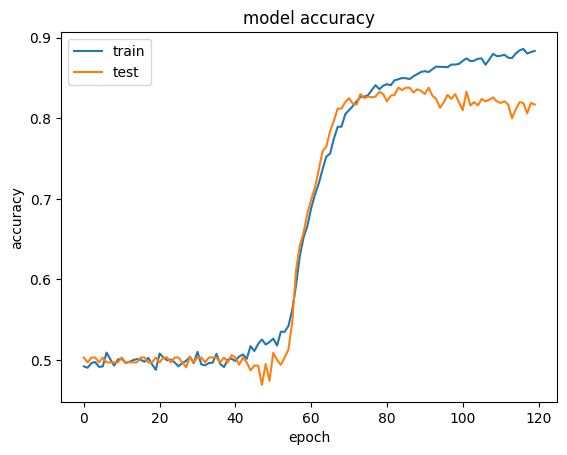

In [93]:
import matplotlib.pyplot as plt
%matplotlib inline
print(history.history.keys())

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [94]:
model.load_weights(filename)
pred_results = model.predict(([inputs_test, queries_test]))

32/32 [==============================] - 1s 9ms/step


In [95]:
test_data[0][0]

['Mary',
 'got',
 'the',
 'milk',
 'there',
 '.',
 'John',
 'moved',
 'to',
 'the',
 'bedroom',
 '.']

In [96]:
story =' '.join(word for word in test_data[0][0])
print(story)

Mary got the milk there . John moved to the bedroom .


In [97]:
query = ' '.join(word for word in test_data[0][1])
print(query)

Is John in the kitchen ?


In [98]:
print("True Test Answer from Data is:",test_data[0][2])

True Test Answer from Data is: no


In [99]:

val_max = np.argmax(pred_results[0])

for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

print("Predicted answer is: ", k)
print("Probability of certainty was: ", pred_results[0][val_max])

Predicted answer is:  no
Probability of certainty was:  0.9012722


In [142]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [161]:

my_story = "John left the kitchen . Sandra dropped the football in the garden ."
my_story.split()

['John',
 'left',
 'the',
 'kitchen',
 '.',
 'Sandra',
 'dropped',
 'the',
 'football',
 'in',
 'the',
 'garden',
 '.']

In [162]:
my_question = "Is the football in the garden ?"

In [163]:
my_question.split()

['Is', 'the', 'football', 'in', 'the', 'garden', '?']

In [164]:
mydata = [(my_story.split(),my_question.split(),'yes')]

In [165]:
my_story,my_ques,my_ans = vectorize_stories(mydata)

In [166]:
pred_results = model.predict(([ my_story, my_ques]))

1/1 [==============================] - 0s 26ms/step


In [167]:
val_max = np.argmax(pred_results[0])

for key, val in tokenizer.word_index.items():
    if val == val_max:
        k = key

print("Predicted answer is: ", k)
print("Probability of certainty was: ", pred_results[0][val_max])

Predicted answer is:  yes
Probability of certainty was:  0.97802013
